In [1]:
import pandas as pd
#importiert pandas
import numpy as np
#importiert numpy
import matplotlib.pyplot as plt
#importier nur pyplot von matplotlib
from statistics import stdev
from scipy import stats
import random
import seaborn as sb
import os, os.path
%matplotlib inline

In [2]:
#constant values
DATA_DIRECTORY = '..\\Daten_hoher_kontrast\\'

In [3]:
proband_directories = [name for name in os.listdir(DATA_DIRECTORY) if (os.path.isdir(os.path.join(DATA_DIRECTORY, name))) & ('proband' in name)]
all_proband_dataframe_dict = {}
for i in range(len(proband_directories)):
    proband_name = proband_directories[i].split('_')[1]
    proband_files = [name for name in os.listdir(os.path.join(DATA_DIRECTORY, proband_directories[i])) if (os.path.isfile(os.path.join(DATA_DIRECTORY, proband_directories[i], name)) & ('.dat' in name))]
    dataframe_dict = {}
    for file in proband_files:
        dataframe_dict[file] = pd.read_table(os.path.join(DATA_DIRECTORY, proband_directories[i], file), sep=', ', engine='python')
    all_proband_dataframe_dict[proband_name] = dataframe_dict
#kann mit der .dat datei umgehen, regex, wenn man hinter das Leerzeichen noch ein + setzt, dann werden unendliche viele Leerzeichen in der Trennung erkannt


In [4]:
for proband in all_proband_dataframe_dict:
    for file_name in all_proband_dataframe_dict[proband]:
        td_2 = all_proband_dataframe_dict[proband][file_name]
        td_2["Kreis"] = 360
        #Spalte 'Kreis' eingefügt, da der absolute Wert '360' in Formel nicht angenommen wurde

        td_2["delta_fg_bg"] = np.zeros((64,))

        for j in range(td_2['bg'].shape[0]):
            dist = td_2['fg'][j] - td_2['bg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_fg_bg"] = dist
        all_proband_dataframe_dict[proband][file_name] = td_2

In [5]:
for proband in all_proband_dataframe_dict:
    for file_name in all_proband_dataframe_dict[proband]:
        td_2 = all_proband_dataframe_dict[proband][file_name]
        td_2["delta_phi"] = np.zeros((64,))

        for j in range(td_2['phi'].shape[0]):
            dist = td_2['phi'][j] - td_2['fg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_phi"] = dist
        all_proband_dataframe_dict[proband][file_name] = td_2

In [6]:
all_proband_delta_fg_bg_values_dict = {}
all_proband_mean_values_dict = {}
all_proband_stand_error_dict = {}
for proband in all_proband_dataframe_dict:
    delta_fg_bg_values_dict = {}
    mean_values_dict = {}
    stand_error_dict = {}
    for file_name in all_proband_dataframe_dict[proband]:  
    #In the end, mean_values at position i is the mean value corresponding to delta_fg_bg_values at position i
        td_2 = all_proband_dataframe_dict[proband][file_name]
        delta_fg_bg_set = set(td_2['delta_fg_bg'])
        delta_fg_bg_values = list(delta_fg_bg_set)
        list_with_delta_phi_values = []
        for j in delta_fg_bg_values:
            indices_with_same_delta_fg_bg = np.where(td_2['delta_fg_bg'] == j)
            sublist_with_delta_phi_values = []
            for index in indices_with_same_delta_fg_bg[0]:
                sublist_with_delta_phi_values.append(td_2.loc[index, 'delta_phi'])
            list_with_delta_phi_values.append(sublist_with_delta_phi_values)

        #This section is necessary, because single columns (of the matrix where we want to extract
        #the mean value of each column) have different lengths. np.mean for axis = 1 cannot handle
        #different lengths along axis = 1, therefore each column mean hasy to be calculated on it's own
        mean_values = np.zeros(len(list_with_delta_phi_values))
        stand_error = np.zeros(len(list_with_delta_phi_values))
        for j in range(len(list_with_delta_phi_values)):
            mean_values[j] = np.mean(list_with_delta_phi_values[j])
            stand_error[j] = stats.sem(list_with_delta_phi_values[j])
        print(mean_values)
        delta_fg_bg_values_dict[file_name] = delta_fg_bg_values
        mean_values_dict[file_name] = mean_values
        stand_error_dict[file_name] = stand_error
    all_proband_delta_fg_bg_values_dict[proband] = delta_fg_bg_values_dict
    all_proband_mean_values_dict[proband] = mean_values_dict
    all_proband_stand_error_dict[proband] = stand_error_dict

[-0.674225    5.0167625  -8.69772125 -2.15484125  3.06025     9.0844875
  2.5743875  -6.2569875 ]
[12.298125   -1.2494375  -6.2245625  -5.4231625   4.6176875   2.7659125
  5.643975   -5.15744125]
[ 6.84621250e+00 -1.85000000e-03 -1.01372675e+01  4.11845000e+00
 -1.83646250e+00  7.06583750e+00  1.73633750e+00 -8.48642500e+00]
[11.7616875  0.9492875 -5.6992    -5.3524375 -1.938175   3.91695
  5.8846625  1.8497125]
[-0.146725  -4.1604875  3.4702625  0.647165   4.1467875 -7.3681625
  1.1455    -0.462025   5.5364575]
[-1.2905125 -5.2191     2.83563    0.35415    8.85835   -4.72235
  0.49775   -1.764025   3.9332125]
[-4.5906725  -0.663       2.625125    0.16611575  7.6829125  -3.2679125
  5.49225     1.3745      6.50008875]
[-2.1941     -3.671375    5.30444875  1.3299      9.00579875 -6.776625
  2.12475    -1.340545    2.9985625 ]
[ -0.2742125    5.8406     -14.56122865  -4.3370625    8.315675
  11.2028375    2.28895     -8.4696    ]
[ 14.7382625   3.92815    -9.3980625  -4.7681625   7.44002

In [7]:
print(stand_error)

[2.09957549 2.39046559 2.82226152 3.20944845 3.53375468 3.14146803
 2.3586062  2.16807257 3.04558831]


jgarzke


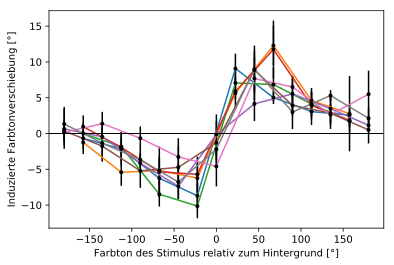

jsaumweber


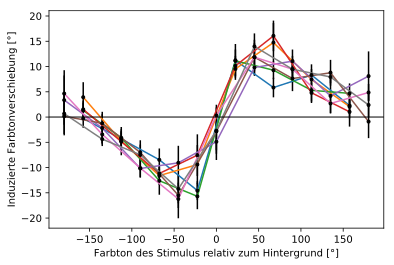

mhuber


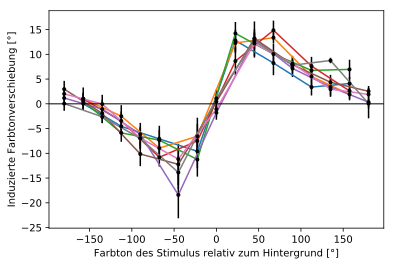

mkirschner


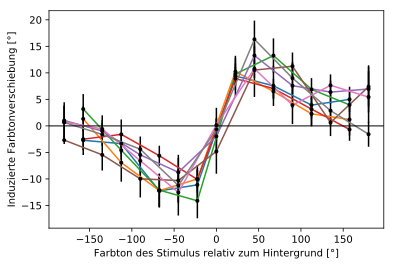

jgarzke
20180509T1025_off_off_40_lr@64_3158016803.dat


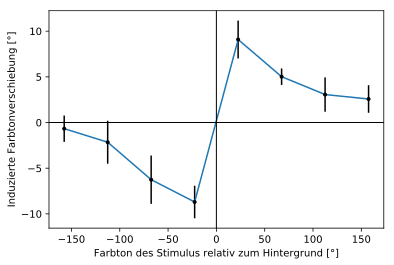

jgarzke
20180509T1047_on_off_40_lr@64_3540188927.dat


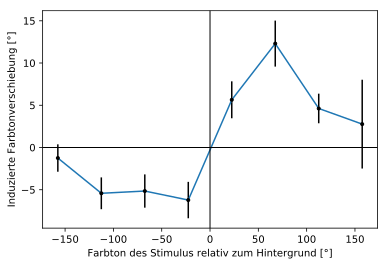

jgarzke
20180514T1157_off_off_40_lr@64_3666723789.dat


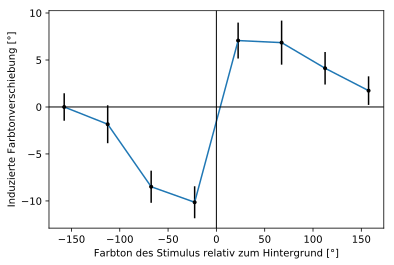

jgarzke
20180514T1210_on_off_40_lr@64_3924092654.dat


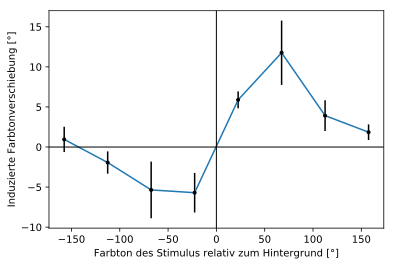

jgarzke
20180517T1209_on_on_40_lr@64_3554288751.dat


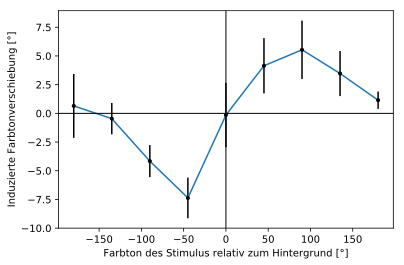

jgarzke
20180517T1225_off_on_40_lr@64_3716247761.dat


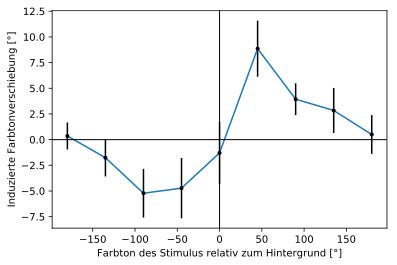

jgarzke
20180523T1606_on_on_40_lr@64_3387879649.dat


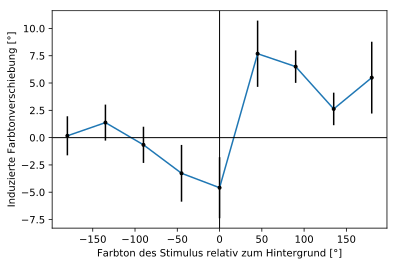

jgarzke
20180523T1623_off_on_40_lr@64_3177450072.dat


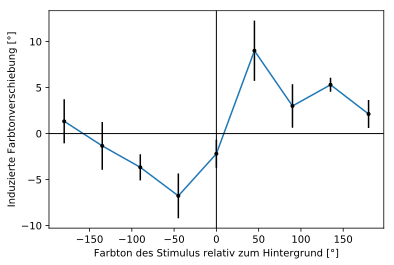

jsaumweber
20180508T1633_off_off_40_lr@64_3158016803.dat


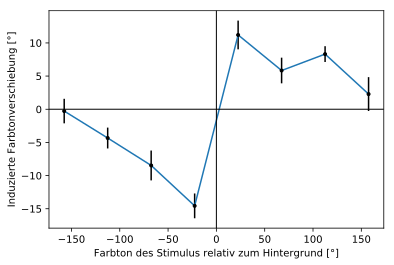

jsaumweber
20180515T1606_on_off_40_lr@64_3540188927.dat


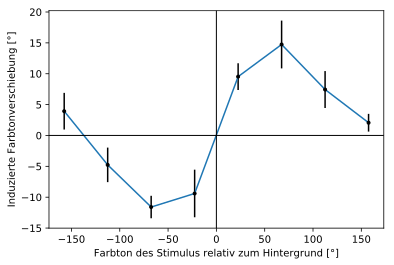

jsaumweber
20180515T1619_off_off_40_lr@64_3666723789.dat


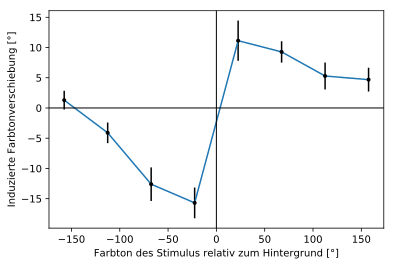

jsaumweber
20180523T1124_on_off_40_lr@64_3924092654.dat


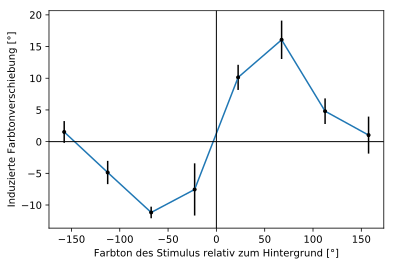

jsaumweber
20180523T1135_on_on_40_lr@64_3554288751.dat


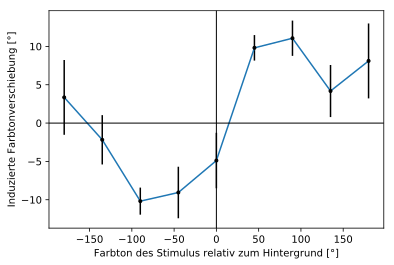

jsaumweber
20180523T1146_off_on_40_lr@64_3716247761.dat


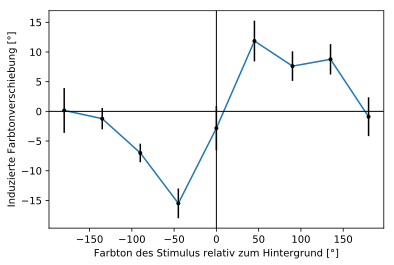

jsaumweber
20180523T1324_on_on_40_lr@64_3387879649.dat


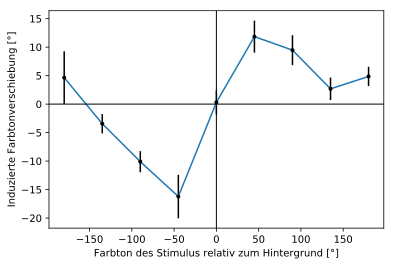

jsaumweber
20180523T1333_off_on_40_lr@64_3177450072.dat


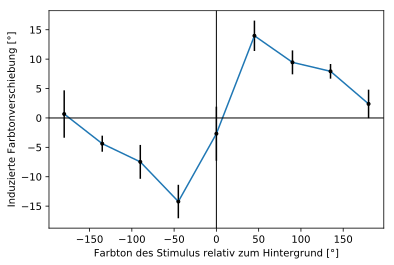

mhuber
20180417T1436_off_off_40_lr@64_3158016803.dat


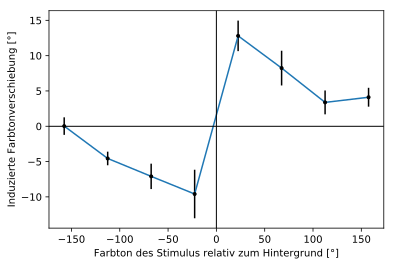

mhuber
20180417T1450_on_off_40_lr@64_3540188927.dat


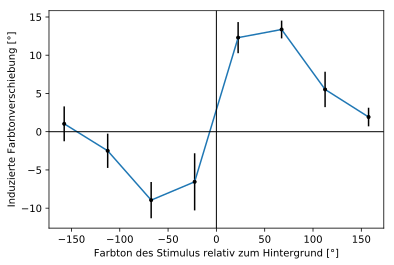

mhuber
20180417T1514_off_off_40_lr@64_3666723789.dat


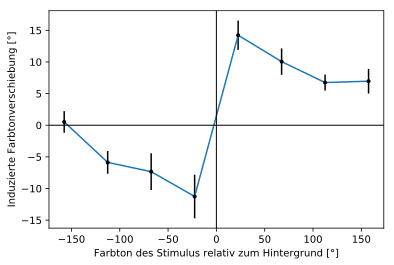

mhuber
20180417T1530_on_off_40_lr@64_3924092654.dat


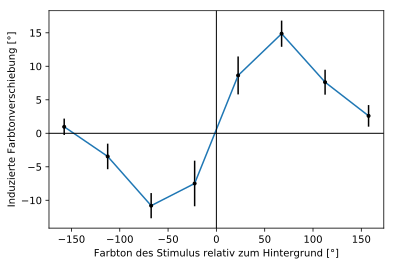

mhuber
20180419T1351_on_on_40_lr@64_3554288751.dat


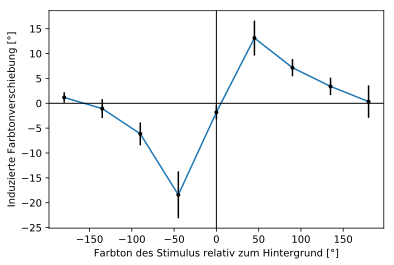

mhuber
20180419T1408_off_on_40_lr@64_3716247761.dat


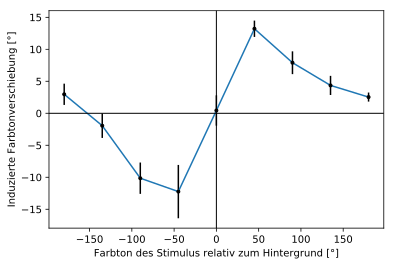

mhuber
20180419T1508_on_on_40_lr@64_3387879649.dat


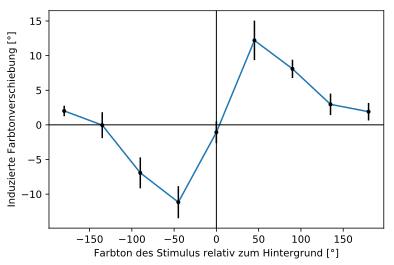

mhuber
20180419T1524_off_on_40_lr@64_3177450072.dat


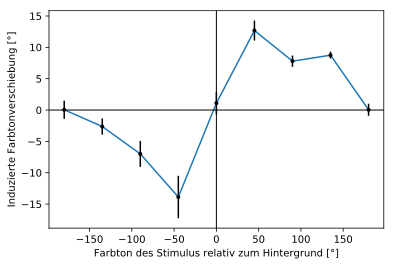

mkirschner
20180509T1648_off_off_40_lr@64_3158016803.dat


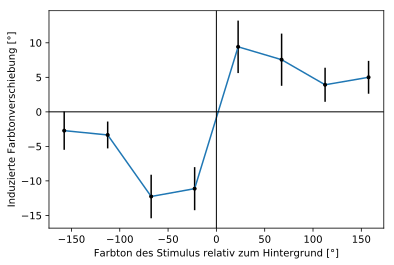

mkirschner
20180516T1610_on_off_40_lr@64_3540188927.dat


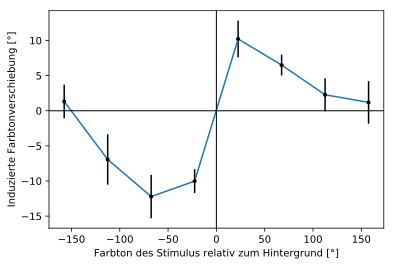

mkirschner
20180516T1623_off_off_40_lr@64_3666723789.dat


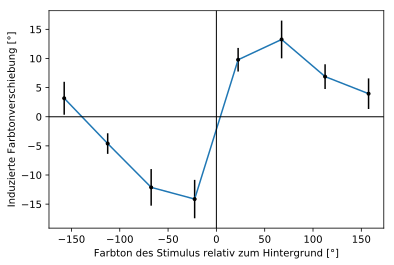

mkirschner
20180516T1634_on_off_40_lr@64_3924092654.dat


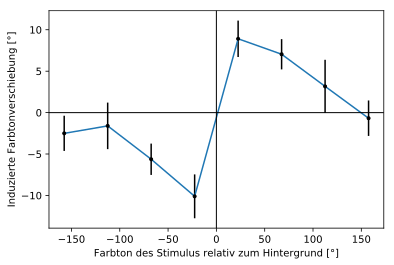

mkirschner
20180628T1313_off_on_40_lr@64_3687604975.dat


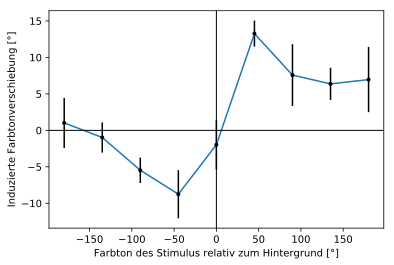

mkirschner
20180628T1322_on_on_40_lr@64_2408779048.dat


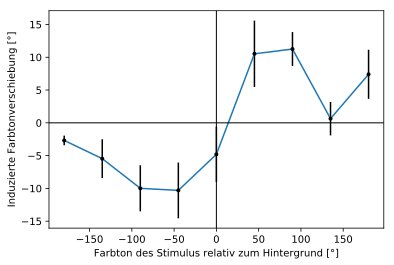

mkirschner
20180628T1331_off_on_40_lr@64_1913582969.dat


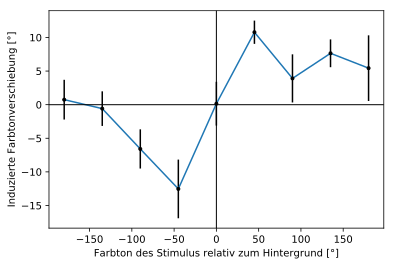

mkirschner
20180628T1340_on_on_40_lr@64_4288389797.dat


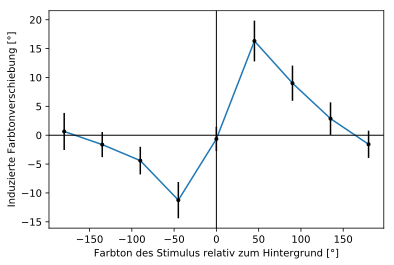

In [8]:
%config InlineBackend.figure_format = 'svg'

####### Graph mit allen Files ######
for proband in all_proband_dataframe_dict:
    print(proband)
    for file_name in all_proband_dataframe_dict[proband]:
        x = all_proband_delta_fg_bg_values_dict[proband][file_name]
        x_copy = x
        y = all_proband_mean_values_dict[proband][file_name]
        sem = all_proband_stand_error_dict[proband][file_name]

        x, y = zip(*sorted(zip(x, y)))
        _, sem = zip(*sorted(zip(x_copy, sem)))
        
        plt.errorbar(x, y, yerr=sem, fmt='.k')

        plt.plot(x, y)
        
    plt.xlabel('Farbton des Stimulus relativ zum Hintergrund [°]')
    plt.ylabel('Induzierte Farbtonverschiebung [°]')
    plt.axhline(0, color= 'black', lw=1)
    plt.show()

#################################

####### Graph mit Einzelfiles, dafür einfach entsprechenden Filenamen eingeben #####
for proband in all_proband_dataframe_dict:
    for file_name in all_proband_dataframe_dict[proband]:
        #file = '20180417T1450_on_off_40_lr@64_3540188927.dat'
        print(proband)
        print(file_name)
        x = all_proband_delta_fg_bg_values_dict[proband][file_name]
        x_copy = x
        y = all_proband_mean_values_dict[proband][file_name]
        sem = all_proband_stand_error_dict[proband][file_name]
        
        x, y = zip(*sorted(zip(x, y)))
        x_copy, sem = zip(*sorted(zip(x_copy, sem)))
        
        plt.errorbar(x, y, yerr=sem, fmt='.k')

        plt.plot(x, y)
        ##################################

        plt.xlabel('Farbton des Stimulus relativ zum Hintergrund [°]')
        plt.ylabel('Induzierte Farbtonverschiebung [°]')
        plt.axhline(0, color= 'black', lw=1)
        plt.axvline(0, color= 'black', lw=1)
        plt.show()


In [9]:
#list(all_proband_dataframe_dict[list(all_proband_dataframe_dict.items())[0][0]].items())[0][1]
column_names = (list(all_proband_dataframe_dict[list(all_proband_dataframe_dict.items())[0][0]].items())[0][1].columns.values)
#column_names
all_proband_data_single_dataframe = pd.DataFrame(columns=column_names)

for proband in all_proband_dataframe_dict:
    for file_name in all_proband_dataframe_dict[proband]:
        all_proband_data_single_dataframe = pd.concat([all_proband_data_single_dataframe, all_proband_dataframe_dict[proband][file_name]], ignore_index=True)

In [10]:
all_proband_data_single_dataframe

,size,bg,fg,phi_start,phi,side,duration,Kreis,delta_fg_bg,delta_phi
0,40,315,292.5,317.44700,285.51300,l,19.79010,360,-22.5,-6.98700
1,40,135,337.5,2.92512,338.10700,r,24.40000,360,-157.5,0.60700
2,40,315,247.5,237.94000,243.80100,l,14.76170,360,-67.5,-3.69900
3,40,45,67.5,76.74180,70.84090,r,21.15530,360,22.5,3.34090
4,40,135,67.5,111.02100,59.18470,l,11.13380,360,-67.5,-8.31530
5,40,225,22.5,27.08450,24.65150,l,27.59760,360,157.5,2.15150
6,40,45,112.5,121.54000,115.15600,r,15.47600,360,67.5,2.65600
7,40,135,337.5,309.66000,333.65400,l,18.44060,360,-157.5,-3.84600
8,40,45,337.5,1.22389,345.47600,r,15.33020,360,-67.5,7.97600
9,40,135,157.5,177.46600,162.41200,r,14.37820,360,22.5,4.91200


In [11]:
hue_shift_for_background_delta_fg_bg_dict = {}
hue_shift_for_background_delta_phi_mean_dict = {}
hue_shift_for_background_delta_phi_sem_dict = {}
for bg_value in all_proband_data_single_dataframe['bg'].unique():
    indices_with_same_bg = np.where(all_proband_data_single_dataframe['bg'] == bg_value)
    list_with_delta_fg_bg = []
    list_with_delta_phi = []
    for index in indices_with_same_bg[0]:
        list_with_delta_fg_bg.append(all_proband_data_single_dataframe.loc[index, 'delta_fg_bg'])
        list_with_delta_phi.append(all_proband_data_single_dataframe.loc[index, 'delta_phi'])
    delta_fg_bg_values = []
    delta_phi_mean_values = []
    delta_phi_sem_values = []
    for delta_fg_bg_value in list(set(list_with_delta_fg_bg)):
        indices_with_same_delta_fg_bg = np.where(list_with_delta_fg_bg == delta_fg_bg_value)
        delta_phi_values = []
        for index in indices_with_same_delta_fg_bg[0]:
            delta_phi_values.append(list_with_delta_phi[index])
        delta_phi_mean = np.mean(delta_phi_values)
        delta_phi_sem = stats.sem(delta_phi_values)
        
        delta_fg_bg_values.append(delta_fg_bg_value)
        delta_phi_mean_values.append(delta_phi_mean)
        delta_phi_sem_values.append(delta_phi_sem)
    
    hue_shift_for_background_delta_fg_bg_dict[bg_value] = delta_fg_bg_values
    hue_shift_for_background_delta_phi_mean_dict[bg_value] = delta_phi_mean_values
    hue_shift_for_background_delta_phi_sem_dict[bg_value] = delta_phi_sem_values   
    
    
    
    #hue_shift_for_background_dict[bg_value] = list_with_delta_fg_bg_and_delta_phi

jgarzke


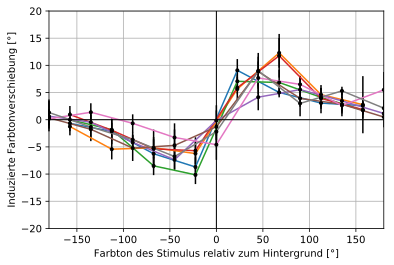

(2.39533121787642, 2.5988341394796595, 1.4202006038823736, 2.4334495927849003, 1.5325757063565517, 3.2778460391153863, 2.3656450714896757, 0.7634829287441189, 1.5215326907978892)
jsaumweber


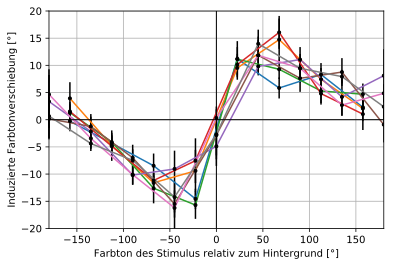

(4.0310983245884735, 1.3682238781406717, 2.8816870809320556, 2.8442105226482197, 4.598426065514155, 2.5866591333327165, 2.0333961962807696, 1.2459256439619186, 2.422206651485382)
mhuber


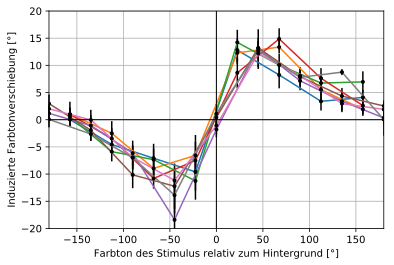

(1.452143945674236, 1.2883414591383826, 2.068940032963741, 3.383257580495778, 1.7590698997763303, 1.5885636887260954, 0.8988132556594308, 0.5518767606370555, 0.9582480867882454)
mkirschner


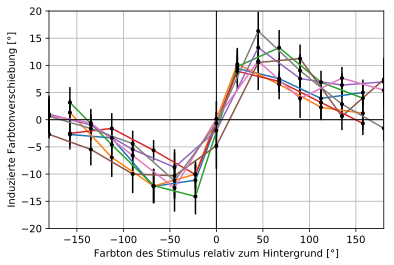

(3.209448450313998, 2.168072571577115, 2.3904655886256414, 3.141468029352194, 2.0995754932945014, 3.5337546796390003, 3.0455883120060228, 2.822261521301763, 2.358606204767266)
jgarzke
20180509T1025_off_off_40_lr@64_3158016803.dat


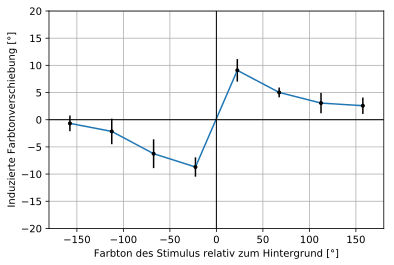

jgarzke
20180509T1047_on_off_40_lr@64_3540188927.dat


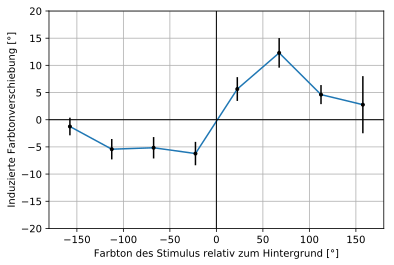

jgarzke
20180514T1157_off_off_40_lr@64_3666723789.dat


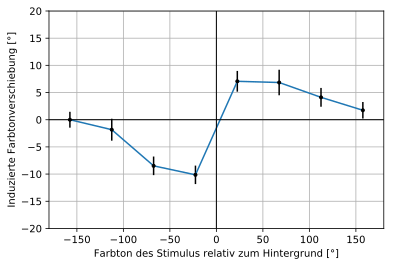

jgarzke
20180514T1210_on_off_40_lr@64_3924092654.dat


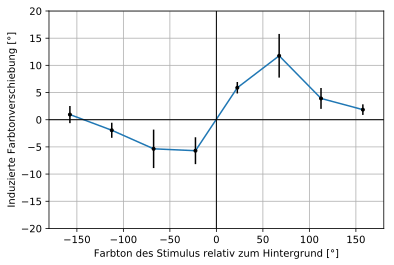

jgarzke
20180517T1209_on_on_40_lr@64_3554288751.dat


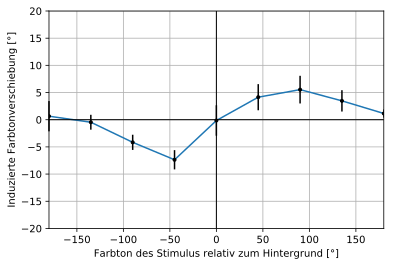

jgarzke
20180517T1225_off_on_40_lr@64_3716247761.dat


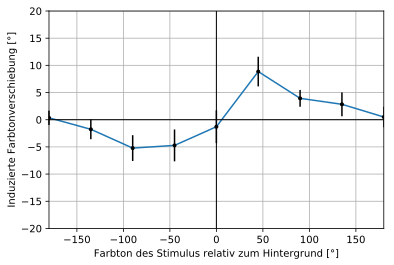

jgarzke
20180523T1606_on_on_40_lr@64_3387879649.dat


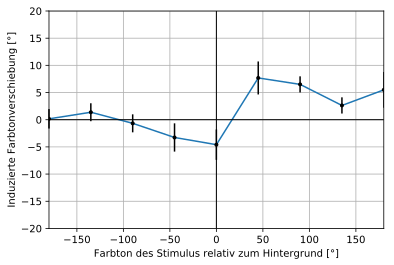

jgarzke
20180523T1623_off_on_40_lr@64_3177450072.dat


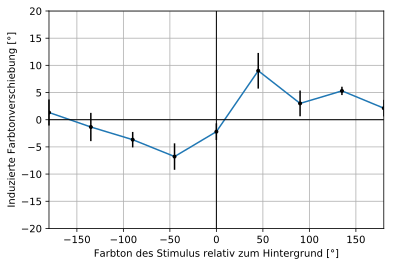

jsaumweber
20180508T1633_off_off_40_lr@64_3158016803.dat


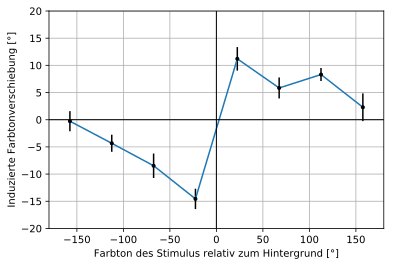

jsaumweber
20180515T1606_on_off_40_lr@64_3540188927.dat


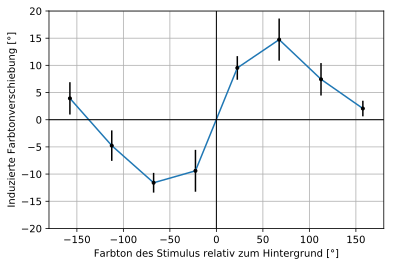

jsaumweber
20180515T1619_off_off_40_lr@64_3666723789.dat


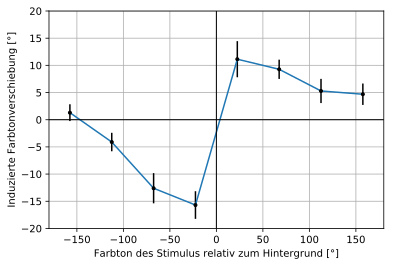

jsaumweber
20180523T1124_on_off_40_lr@64_3924092654.dat


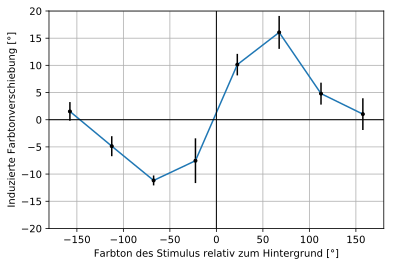

jsaumweber
20180523T1135_on_on_40_lr@64_3554288751.dat


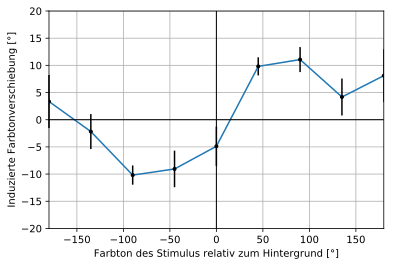

jsaumweber
20180523T1146_off_on_40_lr@64_3716247761.dat


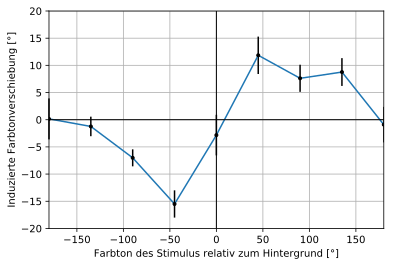

jsaumweber
20180523T1324_on_on_40_lr@64_3387879649.dat


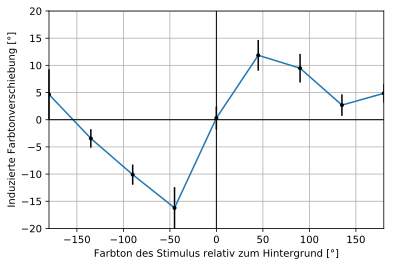

jsaumweber
20180523T1333_off_on_40_lr@64_3177450072.dat


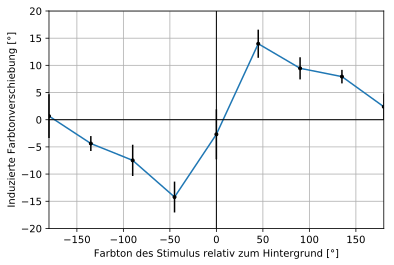

mhuber
20180417T1436_off_off_40_lr@64_3158016803.dat


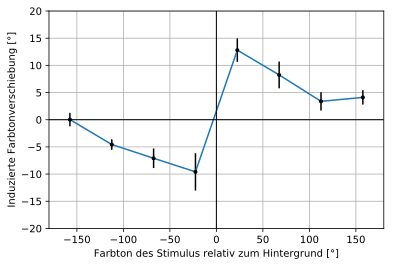

mhuber
20180417T1450_on_off_40_lr@64_3540188927.dat


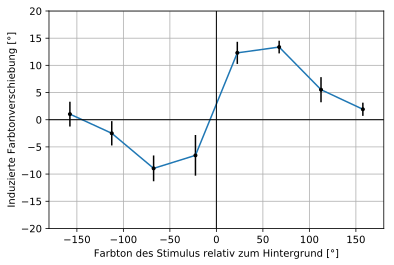

mhuber
20180417T1514_off_off_40_lr@64_3666723789.dat


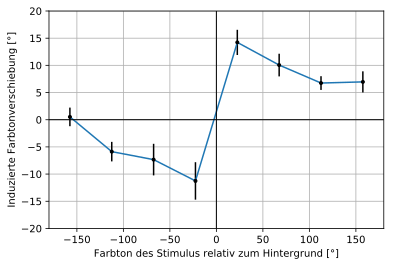

mhuber
20180417T1530_on_off_40_lr@64_3924092654.dat


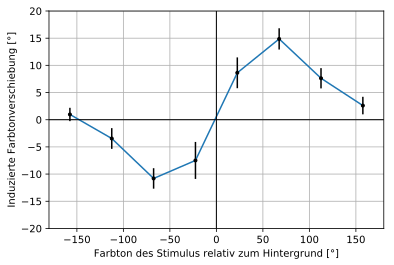

mhuber
20180419T1351_on_on_40_lr@64_3554288751.dat


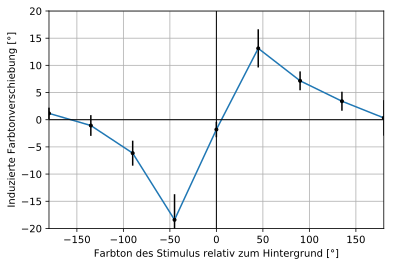

mhuber
20180419T1408_off_on_40_lr@64_3716247761.dat


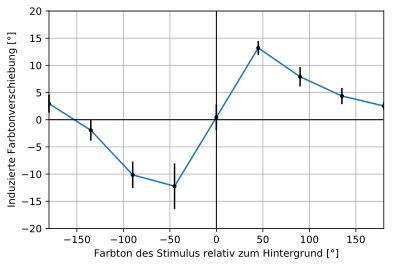

mhuber
20180419T1508_on_on_40_lr@64_3387879649.dat


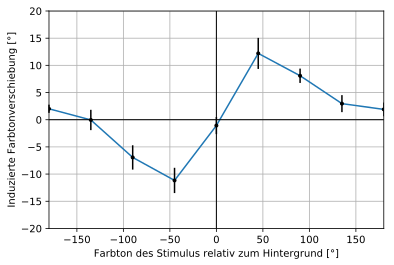

mhuber
20180419T1524_off_on_40_lr@64_3177450072.dat


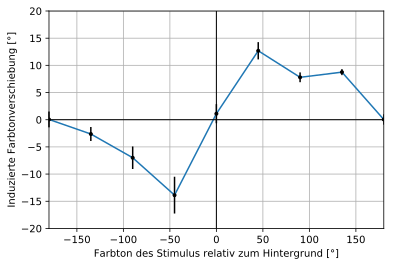

mkirschner
20180509T1648_off_off_40_lr@64_3158016803.dat


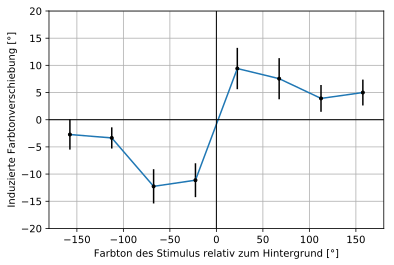

mkirschner
20180516T1610_on_off_40_lr@64_3540188927.dat


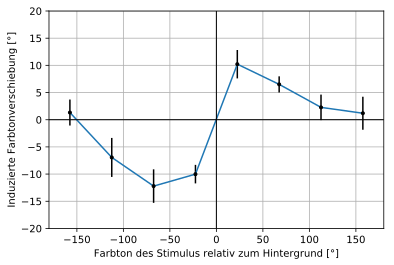

mkirschner
20180516T1623_off_off_40_lr@64_3666723789.dat


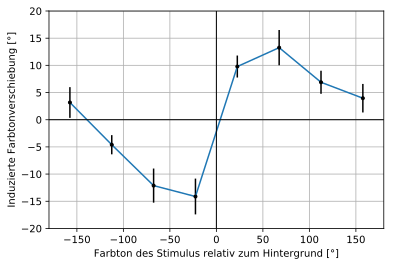

mkirschner
20180516T1634_on_off_40_lr@64_3924092654.dat


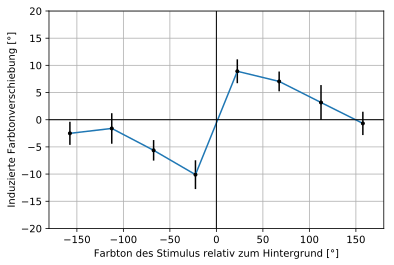

mkirschner
20180628T1313_off_on_40_lr@64_3687604975.dat


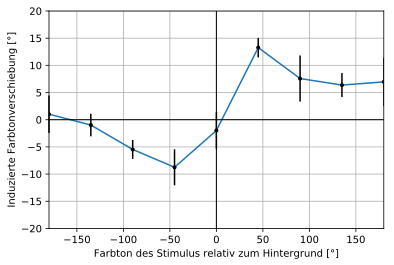

mkirschner
20180628T1322_on_on_40_lr@64_2408779048.dat


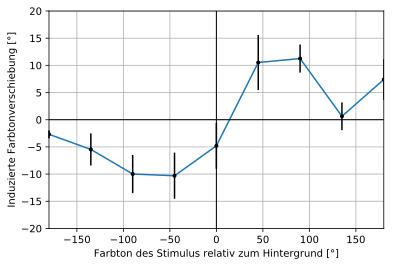

mkirschner
20180628T1331_off_on_40_lr@64_1913582969.dat


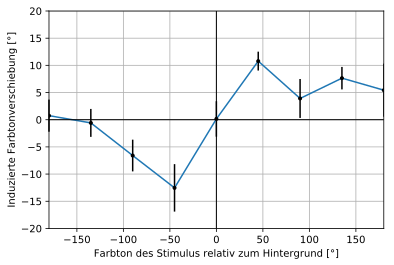

mkirschner
20180628T1340_on_on_40_lr@64_4288389797.dat


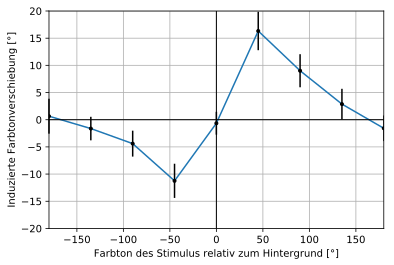

In [12]:
%config InlineBackend.figure_format = 'svg'

####### Graph mit allen Files ######
for proband in all_proband_dataframe_dict:
    print(proband)
    for file_name in all_proband_dataframe_dict[proband]:
        x = all_proband_delta_fg_bg_values_dict[proband][file_name]
        x_copy = x
        y = all_proband_mean_values_dict[proband][file_name]
        sem = all_proband_stand_error_dict[proband][file_name]

        x, y = zip(*sorted(zip(x, y)))
        _, sem = zip(*sorted(zip(x_copy, sem)))
        
        plt.errorbar(x, y, yerr=sem, fmt='.k')

        plt.plot(x, y)
        
    plt.xlabel('Farbton des Stimulus relativ zum Hintergrund [°]')
    plt.ylabel('Induzierte Farbtonverschiebung [°]')
    plt.axhline(0, color= 'black', lw=1)
    plt.axvline(0, color= 'black', lw=1)
    plt.axis([-180, 180, -20, 20])
    plt.grid(True)
    plt.show()
    print(sem)

#################################

####### Graph mit Einzelfiles, dafür einfach entsprechenden Filenamen eingeben #####
for proband in all_proband_dataframe_dict:
    for file_name in all_proband_dataframe_dict[proband]:
        #file = '20180417T1450_on_off_40_lr@64_3540188927.dat'
        print(proband)
        print(file_name)
        x = all_proband_delta_fg_bg_values_dict[proband][file_name]
        x_copy = x
        y = all_proband_mean_values_dict[proband][file_name]
        sem = all_proband_stand_error_dict[proband][file_name]
        
        x, y = zip(*sorted(zip(x, y)))
        x_copy, sem = zip(*sorted(zip(x_copy, sem)))
        
        plt.errorbar(x, y, yerr=sem, fmt='.k')

        plt.plot(x, y)
        ##################################

        plt.xlabel('Farbton des Stimulus relativ zum Hintergrund [°]')
        plt.ylabel('Induzierte Farbtonverschiebung [°]')
        plt.axhline(0, color= 'black', lw=1)
        plt.axvline(0, color= 'black', lw=1)
        plt.axis([-180, 180, -20, 20])
        plt.grid(True)
        plt.show()

In [13]:
for proband in all_proband_dataframe_dict:
    print(proband)
    average_time = (sum(td_2['duration']) / 64)
    print(average_time)

jgarzke
7.166006093750001
jsaumweber
7.166006093750001
mhuber
7.166006093750001
mkirschner
7.166006093750001
